In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
import numpy as np
import seaborn as sns
import astsadata
from statsmodels.tsa.stattools import adfuller

In [5]:
# import platform
# print(platform.python_version())

3.7.9


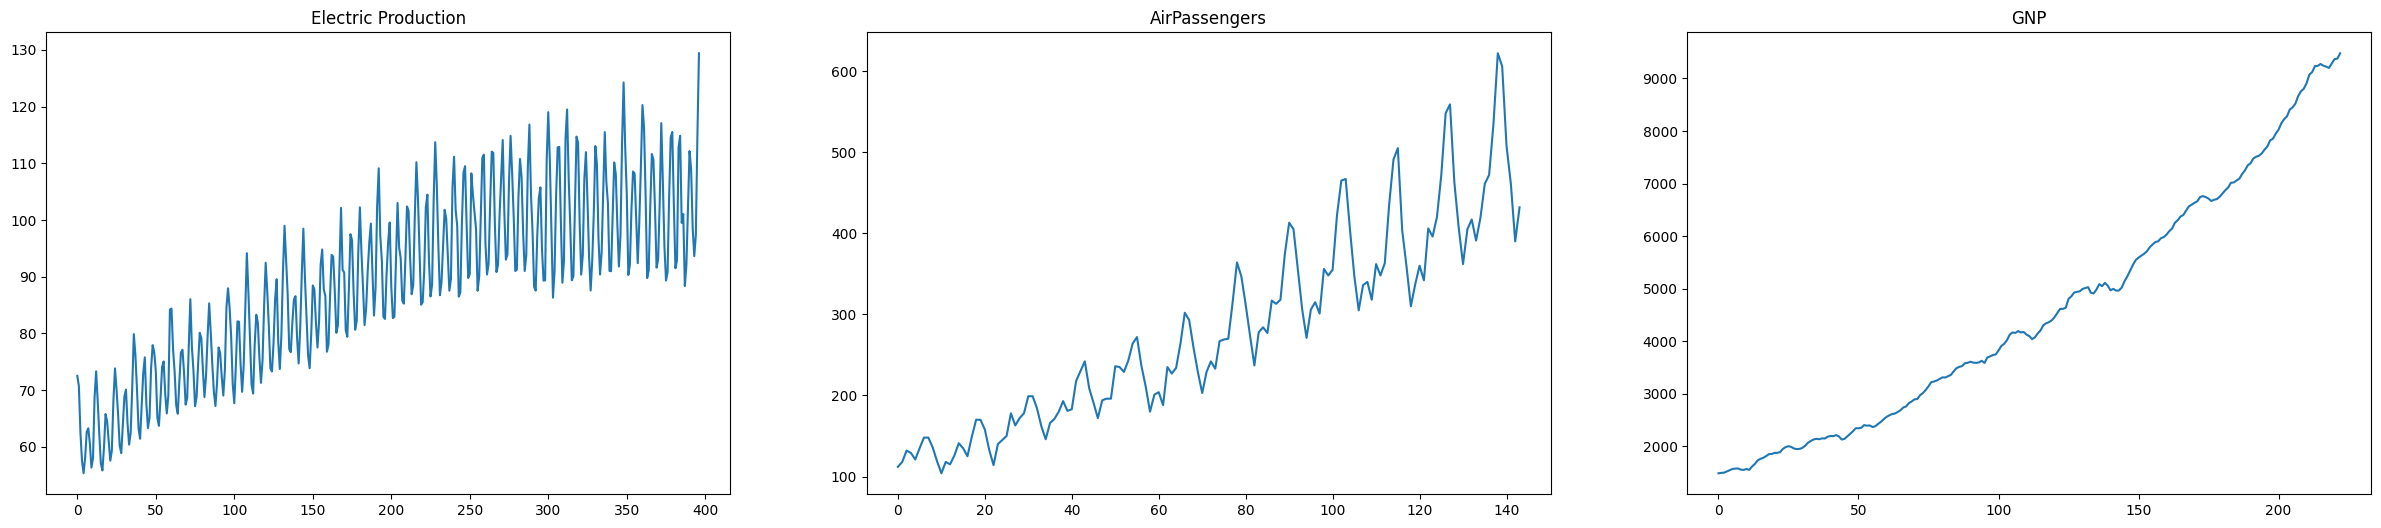

In [3]:
airpassengers = pd.read_csv('AirPassengers.csv')
series = pd.read_csv('Electric_Production.csv'#, index_col="DATE",parse_dates=True
                    )

fig, axs = plt.subplots(2, 2, figsize=(30, 6))
plt.subplot(1,3, 1)
plt.title("Electric Production")
plt.plot(series["Value"])
plt.subplot(1, 3, 2)
plt.title("AirPassengers")
plt.plot(airpassengers["#Passengers"])
plt.subplot(1,3, 3)
gnp_data = astsadata.gnp
plt.title("GNP")
plt.plot(gnp_data["value"].to_numpy())

In [4]:
series['DATE'] = pd.to_datetime(series['DATE'])
series=series.dropna()
series.head()

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [5]:
series.columns=['Date', 'Consumption']
series.set_index('Date', inplace=True)
series.head()

,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


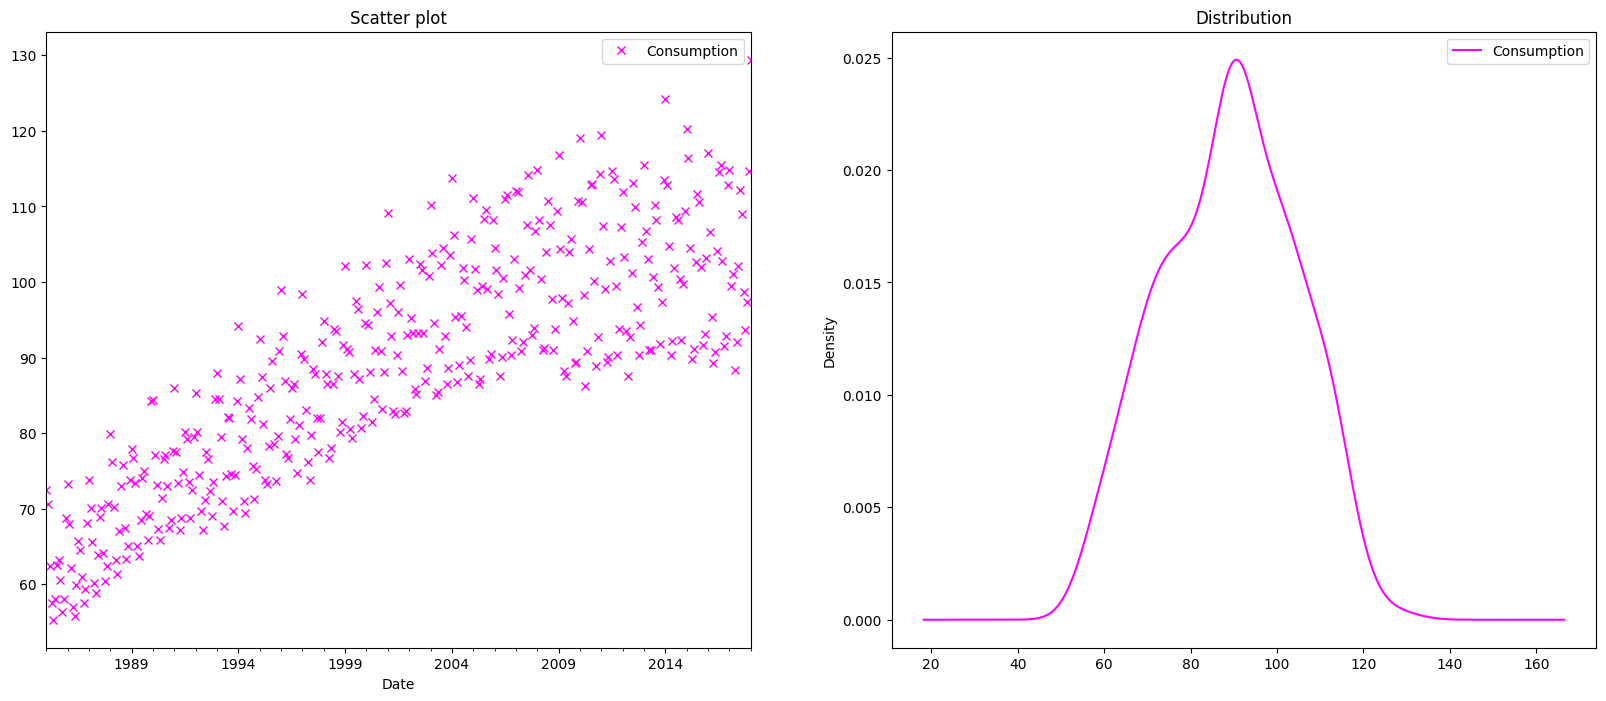

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
series.plot(style='x',ax=ax1,title="Scatter plot", color = 'magenta')
series.plot(kind='kde',ax=ax2,title="Distribution",color = 'magenta')
plt.show()

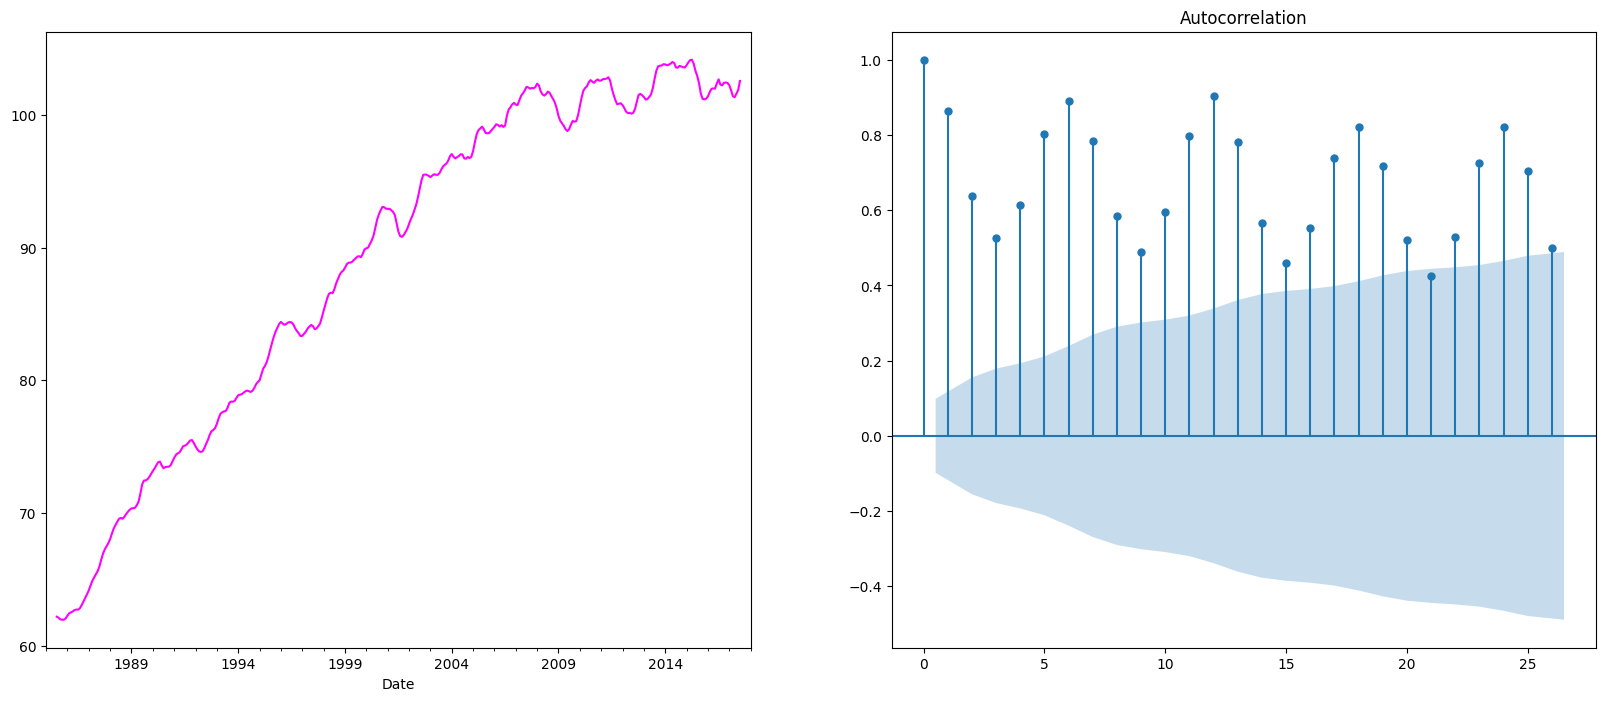

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
result = seasonal_decompose(series)
result.trend.plot(color = "magenta",ax=ax1)
plot_acf(series,ax=ax2);

In [11]:
# result.seasonal.plot(figsize=(20,8))

adf   -2.25699035004725
p-value   0.18621469116586592
usedlag   15
nobs   381
critical values   {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


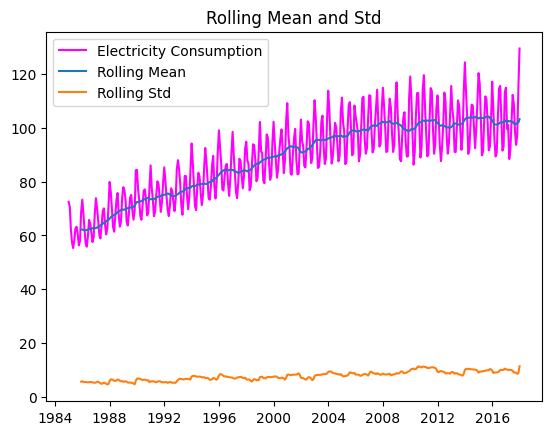

In [8]:

def test_stationarity(series):
    rolmean = series.rolling(12).mean()
    rolstd = series.rolling(12).std()
    plt.plot(series, color='magenta', label='Electricity Consumption')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label = 'Rolling Std')
    plt.legend()
    adft = adfuller(series['Consumption'],autolag='AIC')
    labels = ['adf','p-value','usedlag','nobs','critical values']
    for i in range(5):
        print(labels[i]," ",adft[i])

def test_stationarity_graph(series):
    rolmean = series.rolling(12).mean()
    rolstd = series.rolling(12).std()
    plt.plot(series, color='magenta', label='Electricity Consumption')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label = 'Rolling Std')
    plt.legend()



test_stationarity(series)

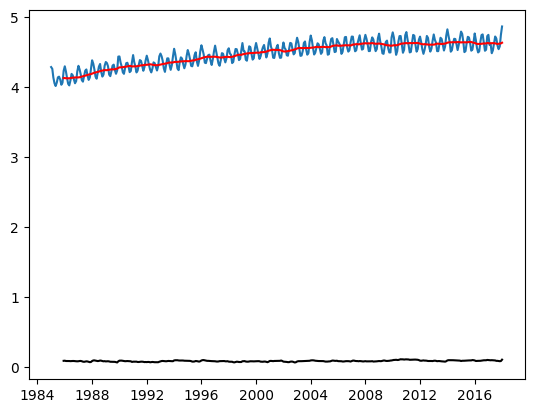

In [9]:
series_log = np.log(series)
moving_avg = series_log.rolling(12).mean()
std_dev = series_log.rolling(12).std()
plt.plot(series_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

adf   -6.748333370019161
p-value   2.995161498115556e-09
usedlag   14
nobs   381
critical values   {'1%': -3.4476305904172904, '5%': -2.869155980820355, '10%': -2.570827146203181}


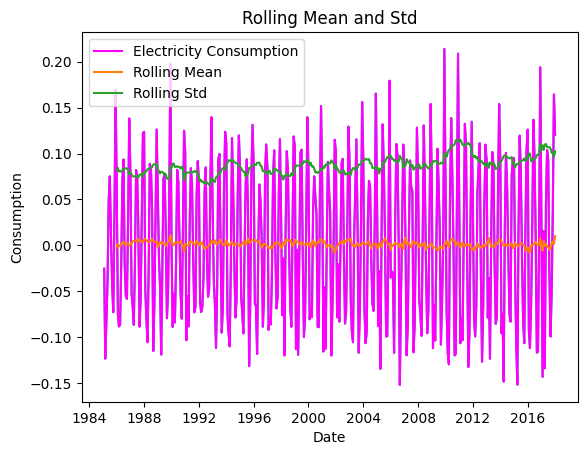

In [20]:
series_log_diff = series_log - series_log.shift()

plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(series_log_diff)
series_log_diff.dropna(inplace=True)
test_stationarity(series_log_diff)


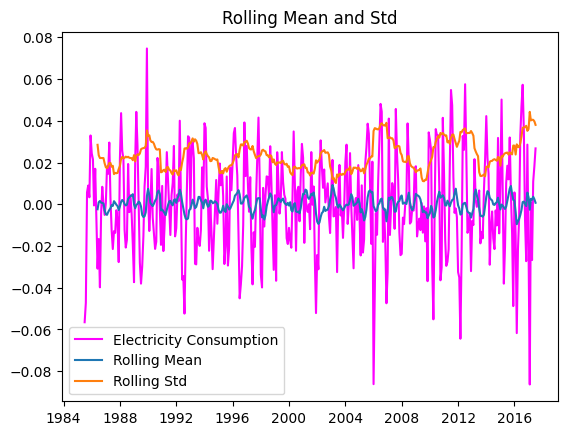

In [24]:
result = seasonal_decompose(series_log, model='additive', period = 12)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity_graph(residual)

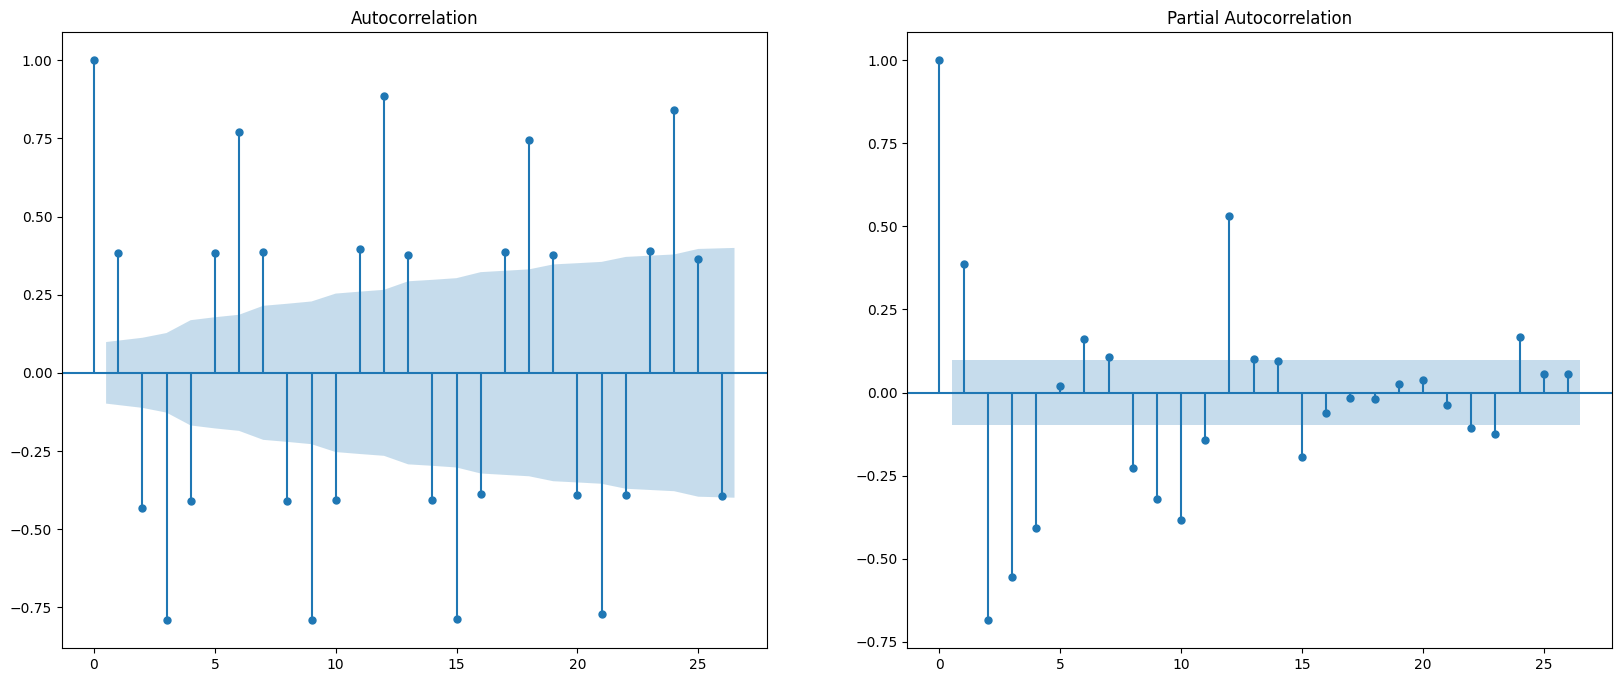

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
plot_acf(series_log_diff,ax=ax1);
plot_pacf(series_log_diff,ax=ax2);

In [26]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RSS : 0.5177079522915149


c:\python\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


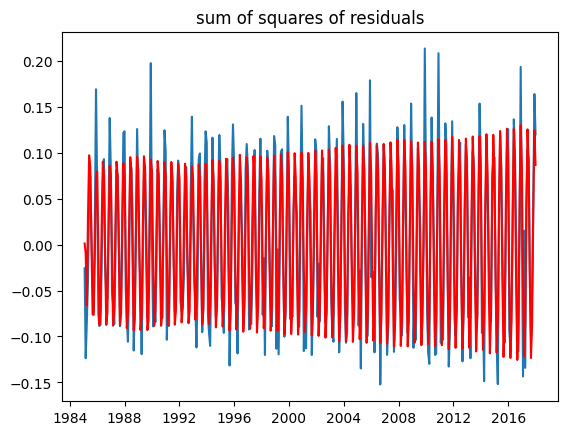

In [36]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series_log, order=(2,1,2))
result_AR = model.fit(disp = 0)
plt.plot(series_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS :', sum((result_AR.fittedvalues-series_log_diff["Consumption"])**2))

In [16]:
series_log

,Consumption
Date,
1985-01-01,4.283658
1985-02-01,4.258049
1985-03-01,4.134369
1985-04-01,4.051287
1985-05-01,4.013046
...,...
2017-09-01,4.591227
2017-10-01,4.539177
2017-11-01,4.578168


In [17]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

def generate_dates(n, start_date):
    dates = []
    current_date = datetime.strptime(start_date, '%Y-%m-%d') 

    for _ in range(n):
        dates.append(current_date.date())  
        current_date += relativedelta(months=1) 

    return dates

result = generate_dates(20, '2018-01-01')
predicted_values = pd.DataFrame({'Date': result, 'Consumption': result_AR.forecast(steps=20)[0]})

In [18]:
predicted_values.set_index('Date', inplace=True)

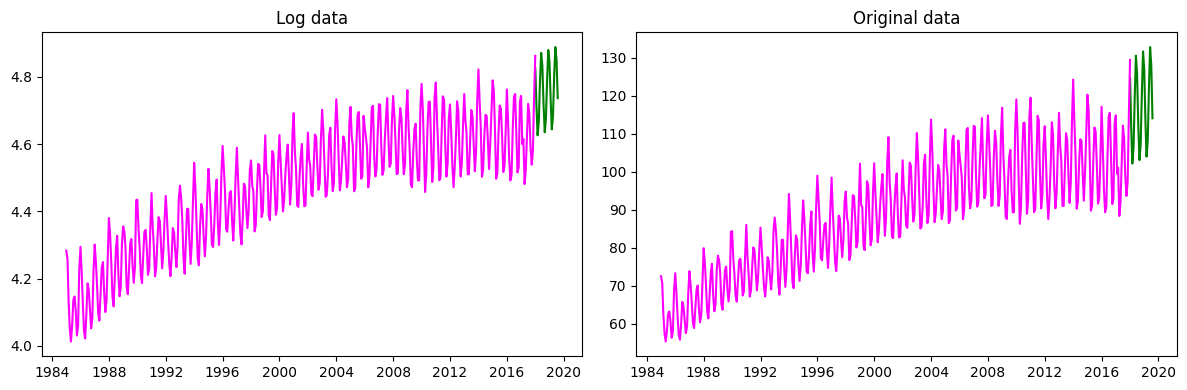

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(predicted_values, color='green')
axs[0].plot(series_log, color='magenta')
axs[0].set_title('Log data')

axs[1].plot(np.exp(predicted_values), color='green')
axs[1].plot(series, color='magenta')
axs[1].set_title('Original data')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()